In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
# 1. تحميل البيانات
invoices_df = pd.read_csv("Invoices_Dataset_for_Association_Rules.csv")

In [3]:
# 2. التحقق من القيم المفقودة
print("عدد القيم المفقودة في كل عمود:")
print(invoices_df.isnull().sum())

عدد القيم المفقودة في كل عمود:
InvoiceID    0
ProductID    0
dtype: int64


In [4]:
# 3. التحقق من التكرارات وحذفها
print(f"عدد الصفوف قبل حذف التكرارات: {invoices_df.shape[0]}")
invoices_df.drop_duplicates(inplace=True)
print(f"عدد الصفوف بعد حذف التكرارات: {invoices_df.shape[0]}")


عدد الصفوف قبل حذف التكرارات: 146
عدد الصفوف بعد حذف التكرارات: 146


In [5]:
# 4. تحويل إلى Basket Format: قائمة المنتجات لكل فاتورة
basket_df = invoices_df.groupby('InvoiceID')['ProductID'].apply(list).reset_index()
print("عرض أول 5 فواتير مع المنتجات:")
print(basket_df.head())

عرض أول 5 فواتير مع المنتجات:
   InvoiceID            ProductID
0       2001       [9, 17, 1, 25]
1       2002  [19, 11, 8, 13, 25]
2       2003             [16, 22]
3       2004    [18, 23, 3, 6, 1]
4       2005  [6, 14, 20, 15, 21]


In [6]:
# 5. تجهيز قائمة معاملات للترميز
transactions = basket_df['ProductID'].tolist()

In [7]:
# 6. ترميز المعاملات إلى مصفوفة ثنائية
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("عرض أول 5 أسطر من البيانات المشفرة:")
print(df_encoded.head())

عرض أول 5 أسطر من البيانات المشفرة:
      1      2      3      4      5      6      7      8      9      10  ...  \
0   True  False  False  False  False  False  False  False   True  False  ...   
1  False  False  False  False  False  False  False   True  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3   True  False   True  False  False   True  False  False  False  False  ...   
4  False  False  False  False  False   True  False  False  False  False  ...   

      16     17     18     19     20     21     22     23     24     25  
0  False   True  False  False  False  False  False  False  False   True  
1  False  False  False   True  False  False  False  False  False   True  
2   True  False  False  False  False  False   True  False  False  False  
3  False  False   True  False  False  False  False   True  False  False  
4  False  False  False  False   True   True  False  False  False  False  

[5 rows x 25 columns]


In [8]:
# 7. استخراج المجموعات المتكررة بدعم أدناه 5%
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
print("المجموعات المتكررة (frequent itemsets):")
print(frequent_itemsets)

المجموعات المتكررة (frequent itemsets):
    support      itemsets
0     0.125           (1)
1     0.050           (2)
2     0.100           (3)
3     0.125           (4)
4     0.050           (5)
..      ...           ...
67    0.050   (1, 18, 23)
68    0.050   (25, 11, 4)
69    0.050   (8, 12, 14)
70    0.050   (8, 18, 14)
71    0.050  (10, 18, 14)

[72 rows x 2 columns]


In [9]:
# 8. استخراج قواعد الارتباط بالرفع >=1 والثقة >=0.6
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[rules['confidence'] >= 0.6]

print("أهم 10 قواعد ارتباط:")
print(rules.head(10))

أهم 10 قواعد ارتباط:
   antecedents consequents  antecedent support  consequent support  support  \
5         (23)         (1)               0.075               0.125    0.050   
17         (4)        (25)               0.125               0.250    0.075   
26        (10)         (7)               0.200               0.175    0.125   
27         (7)        (10)               0.175               0.200    0.125   
33        (12)         (8)               0.075               0.225    0.050   
53        (11)        (25)               0.125               0.250    0.075   
54        (12)        (14)               0.075               0.250    0.050   
59        (15)        (14)               0.075               0.250    0.050   
63        (15)        (24)               0.075               0.100    0.050   
67        (23)        (18)               0.075               0.275    0.050   

    confidence      lift  representativity  leverage  conviction  \
5     0.666667  5.333333               1.

In [10]:
# تحميل بيانات المنتجات
products_df = pd.read_csv("Extended_Products_Dataset__25_Products_ (1).csv")


In [11]:
# عرض أول 5 أسطر لفهم شكل البيانات
print(products_df.head())

   ProductID     ProductName     Category   Price         Brand  Rating  \
0          1  Wireless Mouse  Accessories   15.99      Logitech     4.4   
1          2        Keyboard  Accessories   22.50      Logitech     4.2   
2          3         Monitor  Electronics  150.00       Samsung     4.9   
3          4       USB Cable  Accessories    5.99         Anker     4.3   
4          5    Laptop Stand  Accessories   25.00  AmazonBasics     4.3   

   Stock  WarrantyYears SupplierCountry  WeightKg  VolumeCm3  PowerWatt  \
0    158              3             USA      5.26      11659          2   
1    106              3           China      5.56      16437          0   
2    155              3           Japan      2.26      14371         10   
3    283              2           Japan      2.73      12261          0   
4    274              1     South Korea      0.47       3032         20   

  ConnectivityType MaterialType   UsageType PriceCategory  
0         Wireless        Metal  Perip

In [12]:
# التحقق من القيم المفقودة في الأعمدة
print(products_df.isnull().sum())

ProductID           0
ProductName         0
Category            0
Price               0
Brand               0
Rating              0
Stock               0
WarrantyYears       0
SupplierCountry     0
WeightKg            0
VolumeCm3           0
PowerWatt           0
ConnectivityType    5
MaterialType        0
UsageType           0
PriceCategory       0
dtype: int64


In [13]:
# تعويض القيم المفقودة في ConnectivityType بـ "Unknown"
products_df['ConnectivityType'] = products_df['ConnectivityType'].fillna('Unknown')



In [14]:
# تأكد ما عاد فيه قيم مفقودة
print(products_df['ConnectivityType'].isnull().sum())


0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
numeric_cols = ['Price', 'Rating', 'Stock', 'WeightKg', 'VolumeCm3', 'PowerWatt', 'WarrantyYears']

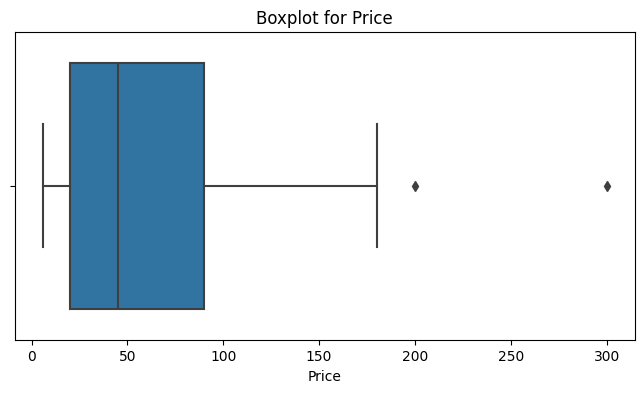

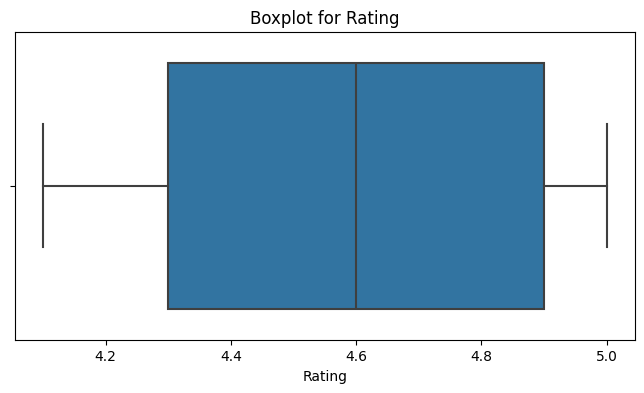

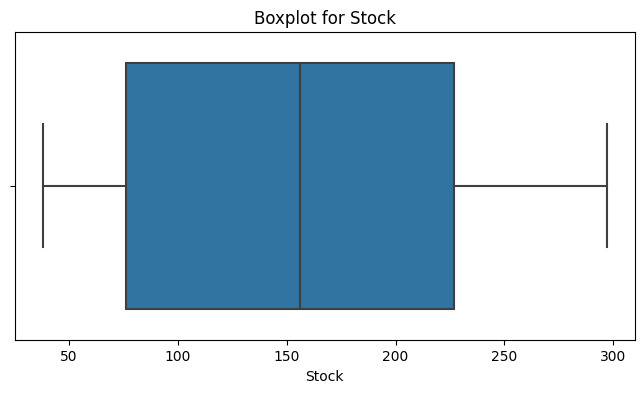

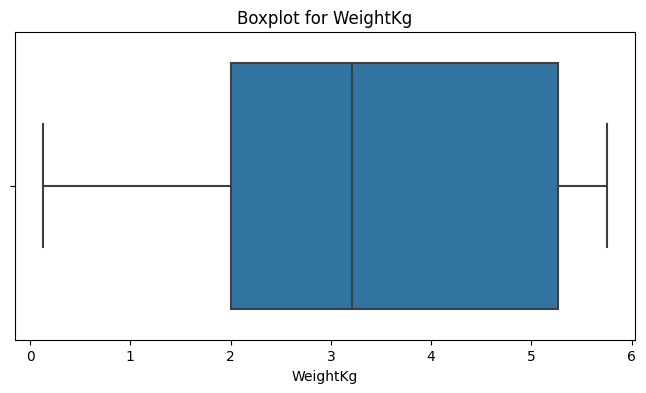

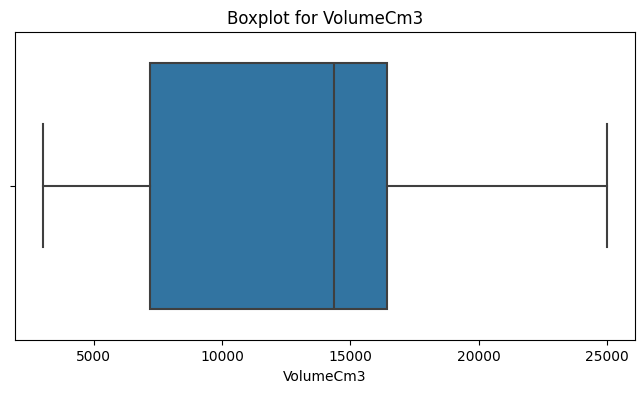

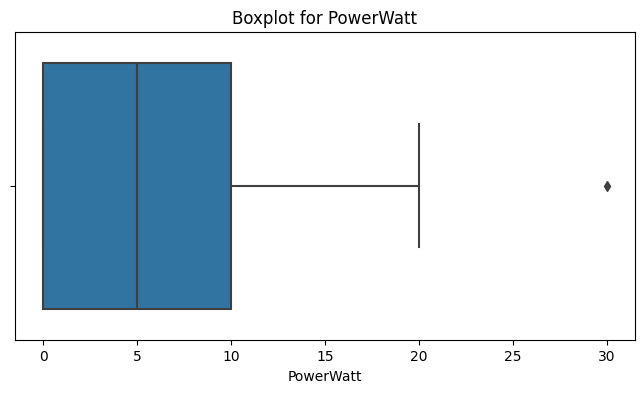

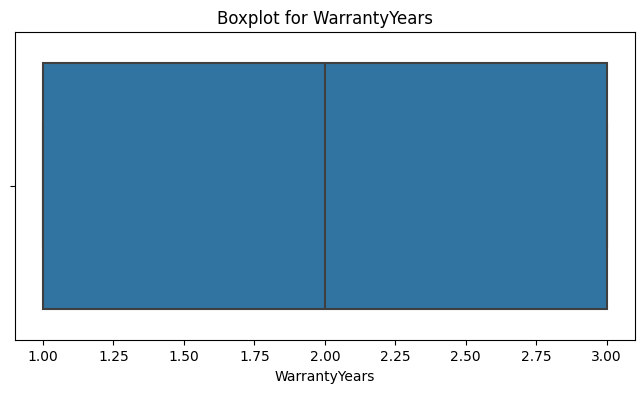

In [17]:
# عرض Boxplot لكل عمود
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=products_df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [20]:
# حساب Z-score وتحديد القيم الشاذة (التي تتعدى 3 أو -3)
from scipy import stats

outliers = {}
for col in numeric_cols:
    z_scores = stats.zscore(products_df[col])
    outlier_indices = np.where(np.abs(z_scores) > 3)[0]
    outliers[col] = outlier_indices
    print(f"عدد القيم الشاذة في {col}: {len(outlier_indices)}")


عدد القيم الشاذة في Price: 1
عدد القيم الشاذة في Rating: 0
عدد القيم الشاذة في Stock: 0
عدد القيم الشاذة في WeightKg: 0
عدد القيم الشاذة في VolumeCm3: 0
عدد القيم الشاذة في PowerWatt: 0
عدد القيم الشاذة في WarrantyYears: 0


In [19]:
# حساب IQR
Q1 = products_df['Price'].quantile(0.25)
Q3 = products_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# حد القيم الشاذة العليا
upper_bound = Q3 + 1.5 * IQR

# عرض القيم الشاذة في Price
outliers = products_df[products_df['Price'] > upper_bound]
print("القيم الشاذة في Price:")
print(outliers[['ProductID', 'ProductName', 'Price']])

القيم الشاذة في Price:
    ProductID  ProductName  Price
12         13   4K Monitor  300.0
17         18  NAS Storage  200.0


In [21]:
# تعويض القيم الشاذة بالوسيط
median_price = products_df['Price'].median()
products_df.loc[products_df['Price'] > upper_bound, 'Price'] = median_price

print(f"تم استبدال القيم الشاذة في Price بالوسيط: {median_price}")


تم استبدال القيم الشاذة في Price بالوسيط: 45.0


In [22]:
# التأكد بعد التعديل
outliers_after = products_df[products_df['Price'] > upper_bound]
print(f"عدد القيم الشاذة بعد المعالجة: {outliers_after.shape[0]}")


عدد القيم الشاذة بعد المعالجة: 0


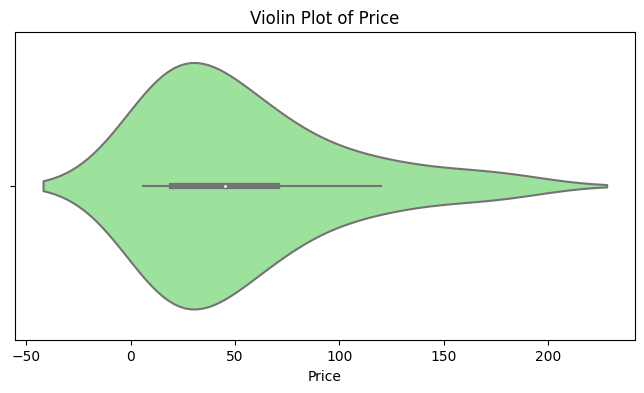

In [23]:
plt.figure(figsize=(8,4))
sns.violinplot(x=products_df['Price'], color='lightgreen')
plt.title('Violin Plot of Price')
plt.show()


In [24]:
categorical_cols = ['Category', 'Brand', 'SupplierCountry', 'ConnectivityType', 
                    'MaterialType', 'UsageType', 'PriceCategory']

products_encoded = pd.get_dummies(products_df, columns=categorical_cols)

print(f"شكل البيانات بعد الترميز: {products_encoded.shape}")
print(products_encoded.head(3))

شكل البيانات بعد الترميز: (25, 53)
   ProductID     ProductName   Price  Rating  Stock  WarrantyYears  WeightKg  \
0          1  Wireless Mouse   15.99     4.4    158              3      5.26   
1          2        Keyboard   22.50     4.2    106              3      5.56   
2          3         Monitor  150.00     4.9    155              3      2.26   

   VolumeCm3  PowerWatt  Category_Accessories  ...  MaterialType_Plastic  \
0      11659          2                  True  ...                 False   
1      16437          0                  True  ...                 False   
2      14371         10                 False  ...                  True   

   UsageType_Accessory  UsageType_Display  UsageType_Furniture  \
0                False              False                False   
1                False              False                False   
2                False              False                False   

   UsageType_Peripheral  UsageType_Storage  PriceCategory_High  \
0       

In [25]:
# تقسيم الميزات
features_with_price = products_encoded.drop(columns=['ProductID', 'ProductName', 'Cluster_With_Price', 'Cluster_Without_Price'], errors='ignore')
features_without_price = features_with_price.drop(columns=['Price'])


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

عدد العناقيد: 2 ، متوسط مؤشر السيلويت: 0.5858
عدد العناقيد: 3 ، متوسط مؤشر السيلويت: 0.5729
عدد العناقيد: 4 ، متوسط مؤشر السيلويت: 0.5864
عدد العناقيد: 5 ، متوسط مؤشر السيلويت: 0.6420
عدد العناقيد: 6 ، متوسط مؤشر السيلويت: 0.6120
عدد العناقيد: 7 ، متوسط مؤشر السيلويت: 0.5997
عدد العناقيد: 8 ، متوسط مؤشر السيلويت: 0.5435
عدد العناقيد: 9 ، متوسط مؤشر السيلويت: 0.5238
عدد العناقيد: 10 ، متوسط مؤشر السيلويت: 0.4964


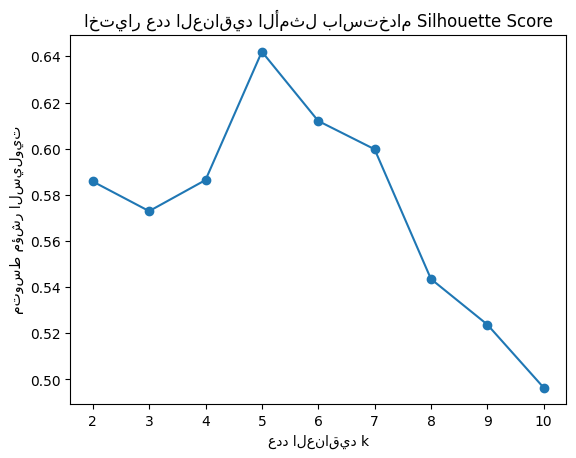

In [26]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 11))
silhouette_avg_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features_with_price)
    silhouette_avg = silhouette_score(features_with_price, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"عدد العناقيد: {k} ، متوسط مؤشر السيلويت: {silhouette_avg:.4f}")

plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.xlabel('عدد العناقيد k')
plt.ylabel('متوسط مؤشر السيلويت')
plt.title('اختيار عدد العناقيد الأمثل باستخدام Silhouette Score')
plt.show()

In [27]:
k = 5
kmeans_with_price = KMeans(n_clusters=k, random_state=42).fit(features_with_price)
kmeans_without_price = KMeans(n_clusters=k, random_state=42).fit(features_without_price)

products_df['Cluster_With_Price'] = kmeans_with_price.labels_
products_df['Cluster_Without_Price'] = kmeans_without_price.labels_

print(products_df[['ProductID', 'ProductName', 'Cluster_With_Price', 'Cluster_Without_Price']])




    ProductID          ProductName  Cluster_With_Price  Cluster_Without_Price
0           1       Wireless Mouse                   2                      2
1           2             Keyboard                   4                      4
2           3              Monitor                   4                      4
3           4            USB Cable                   2                      2
4           5         Laptop Stand                   1                      1
5           6               Webcam                   1                      1
6           7              Headset                   3                      3
7           8         External HDD                   0                      0
8           9         Portable SSD                   4                      4
9          10              Printer                   0                      0
10         11         Gaming Mouse                   4                      4
11         12  Mechanical Keyboard                   4          

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
from sklearn.manifold import TSNE
# تطبيق t-SNE بدون السعر
tsne_no_price = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_results_no_price = tsne_no_price.fit_transform(features_without_price)

# تطبيق t-SNE مع السعر
tsne_with_price = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_results_with_price = tsne_with_price.fit_transform(features_with_price)


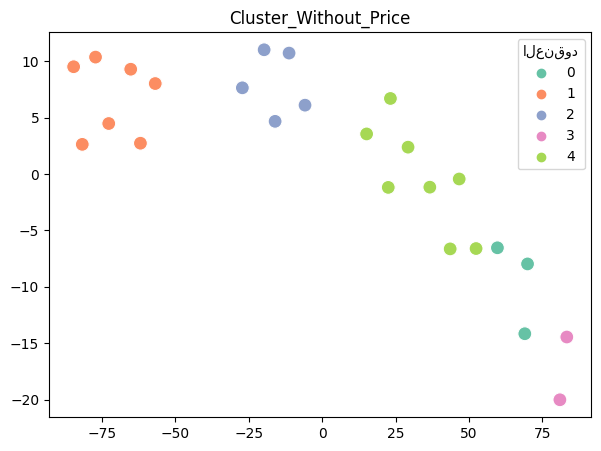

In [31]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=tsne_results_no_price[:,0], y=tsne_results_no_price[:,1],
                hue=products_df['Cluster_Without_Price'], palette="Set2", s=100)
plt.title('Cluster_Without_Price')
plt.legend(title='العنقود')
plt.show()

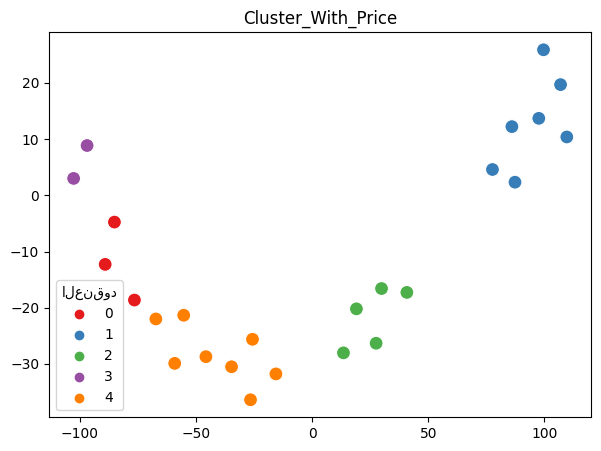

In [32]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=tsne_results_with_price[:,0], y=tsne_results_with_price[:,1],
                hue=products_df['Cluster_With_Price'], palette="Set1", s=100)
plt.title('Cluster_With_Price')
plt.legend(title='العنقود')
plt.show()

In [33]:
def recommend_by_cluster(product_id, products_df, cluster_col='Cluster_With_Price', n=5):
    cluster_id = products_df.loc[products_df['ProductID'] == product_id, cluster_col].values[0]
    recs = products_df[(products_df[cluster_col] == cluster_id) & (products_df['ProductID'] != product_id)]
    return recs.head(n)

print(recommend_by_cluster(3, products_df, cluster_col='Cluster_With_Price'))


    ProductID          ProductName     Category  Price     Brand  Rating  \
1           2             Keyboard  Accessories   22.5  Logitech     4.2   
8           9         Portable SSD      Storage   80.0   Samsung     4.6   
10         11         Gaming Mouse  Accessories   35.0     Razer     4.9   
11         12  Mechanical Keyboard  Accessories   70.0   Corsair     4.2   
13         14           HDMI Cable  Accessories   10.0    UGreen     4.9   

    Stock  WarrantyYears SupplierCountry  WeightKg  VolumeCm3  PowerWatt  \
1     106              3           China      5.56      16437          0   
8     168              3           China      1.13      17074          2   
10    156              2             USA      2.86      16369          0   
11     58              2         Germany      3.44      15035         10   
13    125              3             USA      3.83      15020         20   

   ConnectivityType MaterialType   UsageType PriceCategory  \
1              Both     

In [34]:
def recommend_by_association(product_id, rules_df):
    rules_for_product = rules_df[rules_df['antecedents'].apply(lambda x: product_id in x)]
    assoc_recs = []
    for consequents in rules_for_product['consequents']:
        assoc_recs.extend(list(consequents))
    assoc_recs = list(dict.fromkeys(assoc_recs))
    return assoc_recs


In [35]:
def recommend_combined(product_id, products_df, rules_df, n=5, cluster_col='Cluster_With_Price'):
    cluster_id = products_df.loc[products_df['ProductID'] == product_id, cluster_col].values[0]
    cluster_recs = products_df[
        (products_df[cluster_col] == cluster_id) & 
        (products_df['ProductID'] != product_id)
    ]['ProductID'].tolist()
    
    assoc_recs = []
    relevant_rules = rules_df[rules_df['antecedents'].apply(lambda x: product_id in x)]
    for consequents in relevant_rules['consequents']:
        assoc_recs.extend(list(consequents))
    
    combined = cluster_recs + assoc_recs
    combined = list(dict.fromkeys(combined))
    combined = [pid for pid in combined if pid != product_id]
    
    return combined[:n]

print(recommend_combined(3, products_df, rules, n=5))


[2, 9, 11, 12, 14]


In [36]:
evaluation_df = pd.DataFrame({
    'ProductID': [2, 9, 11, 12, 14],
    'Cluster_Type': ['With_Price', 'With_Price', 'With_Price', 'With_Price', 'With_Price'],
    'User_Score': [90, 85, 80, 88, 92]
})

avg_score = evaluation_df['User_Score'].mean()
print(f"متوسط تقييم جودة التوصية للعنقود 4: {avg_score:.2f}")

evaluation_df = pd.DataFrame({
    'ProductID': [2, 9, 11, 12, 14, 3, 5, 6, 7, 15],
    'Cluster_Type': ['With_Price', 'With_Price', 'With_Price', 'With_Price', 'With_Price',
                     'Without_Price', 'Without_Price', 'Without_Price', 'Without_Price', 'Without_Price'],
    'User_Score': [90, 85, 80, 88, 92, 75, 70, 78, 72, 74]
})

avg_scores = evaluation_df.groupby('Cluster_Type')['User_Score'].mean()
print(avg_scores)

متوسط تقييم جودة التوصية للعنقود 4: 87.00
Cluster_Type
With_Price       87.0
Without_Price    73.8
Name: User_Score, dtype: float64


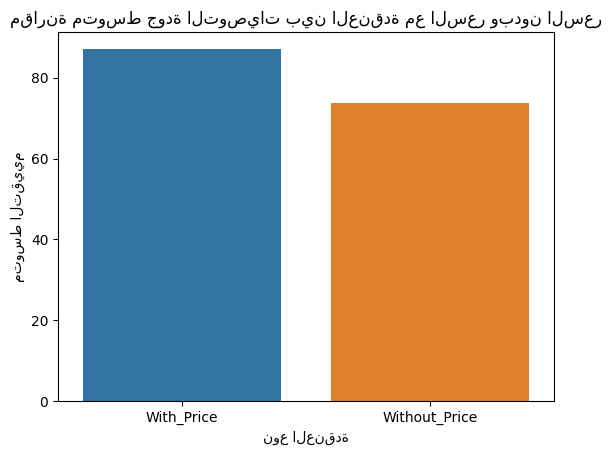

In [37]:
sns.barplot(x=avg_scores.index, y=avg_scores.values)
plt.title("مقارنة متوسط جودة التوصيات بين العنقدة مع السعر وبدون السعر")
plt.ylabel("متوسط التقييم")
plt.xlabel("نوع العنقدة")
plt.show()

In [38]:
# ✅ إدخال نتائج العنقدة إلى قاعدة بيانات MySQL
import mysql.connector
from mysql.connector import Error

try:
    conn = mysql.connector.connect(
        host="127.0.0.1",
        user="root",
        password="",
        database="recommender_system",
        port=3306
    )
    if conn.is_connected():
        print("✅ تم الاتصال بقاعدة البيانات recommender_system")

        cursor = conn.cursor()

        # حذف البيانات القديمة من الجدول
        cursor.execute("DELETE FROM products_clusters")
        conn.commit()
        print("🗑️ تم حذف البيانات القديمة من جدول products_clusters")

        # إدخال بيانات العنقدة مع السعر
        insert_sql = """
        INSERT INTO products_clusters (ProductID, ProductName, Price, Cluster_With_Price, Cluster_Without_Price)
        VALUES (%s, %s, %s, %s, %s)
        """
        for _, row in products_df.iterrows():
            values = (
                int(row['ProductID']),
                row['ProductName'],
                float(row['Price']),
                int(row['Cluster_With_Price']),
                int(row['Cluster_Without_Price'])
            )
            cursor.execute(insert_sql, values)

        conn.commit()
        print(f"✅ تم إدخال {products_df.shape[0]} منتج بنجاح في جدول products_clusters")

except Error as e:
    print(f"❌ خطأ أثناء الاتصال أو الإدخال: {e}")

finally:
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("🔒 تم إغلاق الاتصال بقاعدة البيانات")


✅ تم الاتصال بقاعدة البيانات recommender_system
🗑️ تم حذف البيانات القديمة من جدول products_clusters
✅ تم إدخال 25 منتج بنجاح في جدول products_clusters
🔒 تم إغلاق الاتصال بقاعدة البيانات


In [39]:
# ✅ حفظ قواعد الارتباط
try:
    conn = mysql.connector.connect(
        host="127.0.0.1",
        user="root",
        password="",
        database="recommender_system",
        port=3306
    )
    if conn.is_connected():
        print("✅ تم الاتصال بقاعدة البيانات recommender_system")

        cursor = conn.cursor()

        # حذف البيانات القديمة من جدول قواعد الارتباط
        cursor.execute("DELETE FROM association_rules")
        conn.commit()
        print("🗑️ تم حذف القواعد القديمة من جدول association_rules")

        # تجهيز أمر الإدخال
        insert_sql = """
        INSERT INTO association_rules (Antecedents, Consequents, Support, Confidence, Lift)
        VALUES (%s, %s, %s, %s, %s)
        """

        # إدخال القواعد
        for _, row in rules.iterrows():
            antecedents = ','.join(str(x) for x in row['antecedents'])
            consequents = ','.join(str(x) for x in row['consequents'])
            support = float(row['support'])
            confidence = float(row['confidence'])
            lift = float(row['lift'])

            values = (antecedents, consequents, support, confidence, lift)
            cursor.execute(insert_sql, values)

        conn.commit()
        print(f"✅ تم إدخال {rules.shape[0]} قاعدة ارتباط في جدول association_rules")

except Error as e:
    print(f"❌ خطأ أثناء الاتصال أو الإدخال: {e}")

finally:
    if 'conn' in locals() and conn.is_connected():
        cursor.close()
        conn.close()
        print("🔒 تم إغلاق الاتصال بقاعدة البيانات")




✅ تم الاتصال بقاعدة البيانات recommender_system
🗑️ تم حذف القواعد القديمة من جدول association_rules
✅ تم إدخال 25 قاعدة ارتباط في جدول association_rules
🔒 تم إغلاق الاتصال بقاعدة البيانات
